# Final test Thu

In [1]:
import random as rn
import matplotlib.pyplot as pl
import math as mt

# CID
cid= [0, 1, 8, 5, 6, 6, 6, 6]


# Task A

In [2]:
# form matrices A & B

# initialise empty matrices
A = []
B = []
for i in range(0,8):
    # form rows
    rowA = []
    rowB = []
    for j in range (0,8):
        # form columns
        
        # set values to zero as default
        vA = 0
        vB = 0
        # amend if on special positions
        if j == 0:
            # first column
            vA = cid[i]
        if j == 7:
            # last column
            vA = cid[-1-i]
        if i == 0:
            # first row
            vB = cid[j]
        if i == 7:
            # last row
            vB = cid[-1-j]
        # add these elements to current row (for A and B)    
        rowA += [vA]
        rowB += [vB]
    # add formed row  
    A += [rowA]
    B += [rowB]
    
# print to check
for row in A:
    print(row)
print('')
for row in B:
    print(row)
    
# I am going to compute first:
# C1 = A-B and C2 = A+B
C1 = []
C2 = []
for i in range(0,8):
    # form rows
    rowC1 = []
    rowC2 = []
    for j in range (0,8):
        # form columns
        rowC1 += [A[i][j]+B[i][j]]  # A + B
        rowC2 += [A[i][j]-B[i][j]]  # A - B
    C1 += [rowC1]
    C2 += [rowC2] 
    
# compute matrix-matrix product D = C1*C2, as in Maths notes
D = []
for i in range(0,8):
    row = []
    for j in range (0,8):
        # compute D[i][j]
        s = 0
        for k in range(0,8):
            s += C1[i][k]*C2[k][j]
        row += [s]
    D += [row]    

print('')
for row in D:
    print(row)
    


[0, 0, 0, 0, 0, 0, 0, 6]
[1, 0, 0, 0, 0, 0, 0, 6]
[8, 0, 0, 0, 0, 0, 0, 6]
[5, 0, 0, 0, 0, 0, 0, 6]
[6, 0, 0, 0, 0, 0, 0, 5]
[6, 0, 0, 0, 0, 0, 0, 8]
[6, 0, 0, 0, 0, 0, 0, 1]
[6, 0, 0, 0, 0, 0, 0, 0]

[0, 1, 8, 5, 6, 6, 6, 6]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[6, 6, 6, 6, 5, 8, 1, 0]

[198, -72, -72, -72, -60, -96, -12, 168]
[0, -37, -44, -41, -36, -54, -12, 0]
[0, -44, -100, -76, -78, -96, -54, 0]
[0, -41, -76, -61, -60, -78, -36, 0]
[0, -36, -78, -60, -61, -76, -41, 0]
[0, -54, -96, -78, -76, -100, -44, 0]
[0, -12, -54, -36, -41, -44, -37, 0]
[168, -12, -96, -60, -72, -72, -72, 198]


# Task B

In [ ]:
# number of points
N = 10000
s = 0.1 + cid[5]/20

Nin = 0  # number of points inside the bell
Nout = 0 # number of points outside the bell
# I am storing all teh points in lists, to plot all of them later
xi = []  # x coordinates of points inside
yi = []  # y coordinates of points inside
xo = []  # x coordinates of points outside
yo = []  # y coordinates of points outside

# generate N points
for i in range(0,N):
    # generate random coordinates between 0 and 1
    x = rn.random()
    y = rn.random()
    # evaluate if y is under the bell
    if y < mt.exp(-(x-0.5)**2/s**2):
        # count as under the bell
        Nin += 1
        # add to list of points under the bell
        xi += [x]
        yi += [y]
    else:
        # count as outiside the bell
        Nout += 1
        # add to list of points outside the bell
        xo += [x]
        yo += [y]

# get the ratio of teh two areas
print(Nin/Nout)
# plot
pl.scatter(xi,yi,s=1,c='b')
pl.scatter(xo,yo,s=1,c='r')
# plot the bell
y = []
for x in xi:
    y += [mt.exp(-(x-0.5)**2/s**2)]
pl.scatter(xi,y,s=1,c='g')

# Task C

26366879
2141368
20/03/2021
13859388
14648859


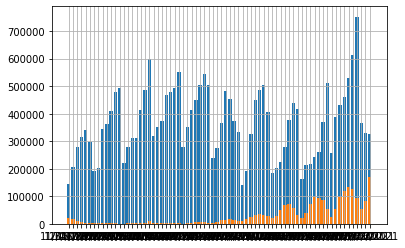

In [7]:
# read the file
f = open('Vax.txt','r')
tmp = f.readlines()  # temp list with all values in the file
f.close()

# calculate the number of days
Nd = int(len(tmp)/5)


# organise the data
# save data to plot in a list
fd = []  # daily total first dose
sd = []  # daily total second dose
days = [] # dates of days
# set counters
c = 0 # poistion of scrolling temp list
fdtot = 0 # cumulative first dose
sdtot = 0 # cumulative second dose
largest = 0 # largest day inoculations
dlargest = 0 # day with largest number of inoculations
pftot = 0 # cumulative Pfizer
aztot = 0 # cumulative AstraZeneca
# repeat for every day
for d in range(0,Nd):
    # read the date of the day
    days += [tmp[c].strip()]
    c += 1
    # initialise daily total of first and second doses
    fdaytot = 0
    sdaytot = 0
    # read First dose vaccinations with Pfizer
    fdtot +=  int(tmp[c]) # add to cumulative first dose
    pftot +=  int(tmp[c]) # add to cumulative Pfizer
    fdaytot += int(tmp[c]) # add to daily tot first dose
    c += 1
    # read First dose vaccinations with AstraZeneca
    fdtot +=  int(tmp[c]) # add to cumulative first dose
    aztot +=  int(tmp[c]) # add to cumulative AZ
    fdaytot += int(tmp[c]) # add to daily tot first dose
    c += 1   
    # read Second dose vaccinations with Pfizer
    sdtot +=  int(tmp[c]) # add to cumulative second dose
    pftot +=  int(tmp[c]) # add to cumulative Pfizer
    sdaytot += int(tmp[c]) # add to daily tot second dose
    c += 1   
    # read Second dose vaccinations AstraZeneca
    sdtot +=  int(tmp[c])  # add to cumulative second dose
    aztot +=  int(tmp[c])  # add to cumulative AZ
    sdaytot += int(tmp[c]) # add to daily tot second dose
    c += 1
    # daily total inoculations
    daytot = fdaytot + sdaytot
    # check if this day inoculation is larger than any previous
    if daytot > largest:
        # today was larger than the largestso far
        # record this date
        dlargest = days[d]
        # update the largest number so far 
        largest = daytot
    # add daily cumulative first and second doses to list, for plots
    fd += [fdaytot]
    sd += [sdaytot]
    
# print
print(fdtot)
print(sdtot)
print(dlargest)
print(pftot)
print(aztot)

# plot
pl.bar(days,fd)
pl.bar(days,sd)
pl.grid()

# Task D

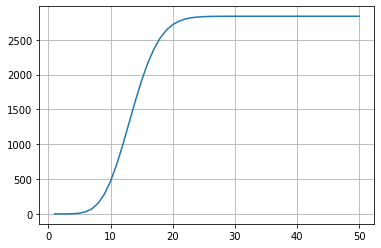

In [3]:
def Series(N):
    a = 3
    P = 0
    # outer sum from 1 to N (included)
    for i in range(1,N+1):
        s = 0
        # inner sum
        for k in range (1,i+1):
            s += (a+10)**(k-3)
        P += s/mt.factorial(i-1)
    return P


P = []  # list of P for various N
Nx = []  # list of N values
# loop for N
for N in range(1,51):
    # compute P for this N
    P += [Series(N)]
    Nx += [N]


pl.plot(Nx,P)
pl.grid()
